# Mock Belt Exam

## Problem:

### An airline company would like to know more about their customers and how to please them. They have provided some information about 20,000 customers as well as the results of a satisfaction survey.

## They would like you to:

### 1. Segment the customers into groups and describe those groups, what they have in common and how they differ.

### 2. Model the data to see if overall customer satisfaction can be predicted by information about their flights and answers to the survey other than overall satisfaction.

### Clustering Instructions:
The airline company would like you to segment the customers and create an analytical report on the clusters describing each group and describing how they are different.

#### 1. Load the dataset.

##### Imports

In [3]:
# import packages
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [4]:
# import data
df = pd.read_csv('Data/airline.csv')

#### 2. Explore the data.


In [6]:
# preview data
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,3,2,0,0,0,1,1,0
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,4,18,2,0,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,4,5,3,0,0,1,1,0,0
3,54,3,453,3,5,5,5,3,4,4,...,3,4,3,1,91,80,0,1,1,0
4,40,1,775,4,3,3,3,4,4,4,...,3,3,3,4,0,0,1,1,1,0


In [8]:
# check for missing values
df.isna().sum().sum()

0

In [10]:
# check for duplicate values
df.duplicated().sum()

0

In [11]:
# view summary statistics
df.describe()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,39.477250,2.027800,1188.548000,2.727950,3.056100,2.751100,2.971350,3.202100,3.255300,3.439100,...,3.623650,3.302850,3.635550,3.282650,14.318350,14.698250,0.490650,0.817850,0.687900,0.43305
std,15.108901,0.963054,1001.136957,1.326886,1.531134,1.396799,1.279575,1.332383,1.348485,1.323434,...,1.186837,1.259131,1.184017,1.311734,36.451829,36.899857,0.499925,0.385978,0.463362,0.49551
min,7.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,27.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
50%,40.000000,2.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
75%,51.000000,3.000000,1733.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000,1.000000,1.00000
max,85.000000,3.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000,1.000000,1.000000,1.000000,1.00000


#### 3. Prepare the data for modeling.

In [12]:
# instantiate scaler
scaler = StandardScaler()

In [13]:
# fit and transform df
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [14]:
# preview scaled df
X_scaled.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,-0.892030,1.009522,0.872482,-0.548629,-0.036640,0.178198,0.022391,-0.902241,-0.930920,-1.087425,...,-0.525486,-0.240529,-0.536788,-0.977853,-0.392812,-0.398338,-0.981472,0.47193,0.673572,-0.873970
1,0.828853,1.009522,-0.507983,1.712360,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,0.317111,0.553689,0.307816,0.546885,0.101003,-0.344136,-0.981472,0.47193,0.673572,1.144204
2,-0.759654,-1.067256,-0.999437,0.205034,1.269614,0.178198,0.803920,-0.151687,-0.189328,-0.331797,...,0.317111,0.553689,1.152419,-0.215484,-0.392812,-0.398338,1.018878,0.47193,-1.484622,-0.873970
3,0.961229,1.009522,-0.734731,0.205034,1.269614,1.610079,1.585449,-0.151687,0.552263,0.423832,...,-0.525486,0.553689,-0.536788,-1.740222,2.103696,1.769746,-0.981472,0.47193,0.673572,-0.873970
4,0.034600,-1.067256,-0.413089,0.958697,-0.036640,0.178198,0.022391,0.598867,0.552263,0.423832,...,-0.525486,-0.240529,-0.536788,0.546885,-0.392812,-0.398338,1.018878,0.47193,0.673572,-0.873970


#### 4. Use a KMeans model to cluster the passengers into an optimal number of clusters.

Use an elbow plot and silhouette score to find the optimal number of clusters.
There must be between 2 and 10 clusters.

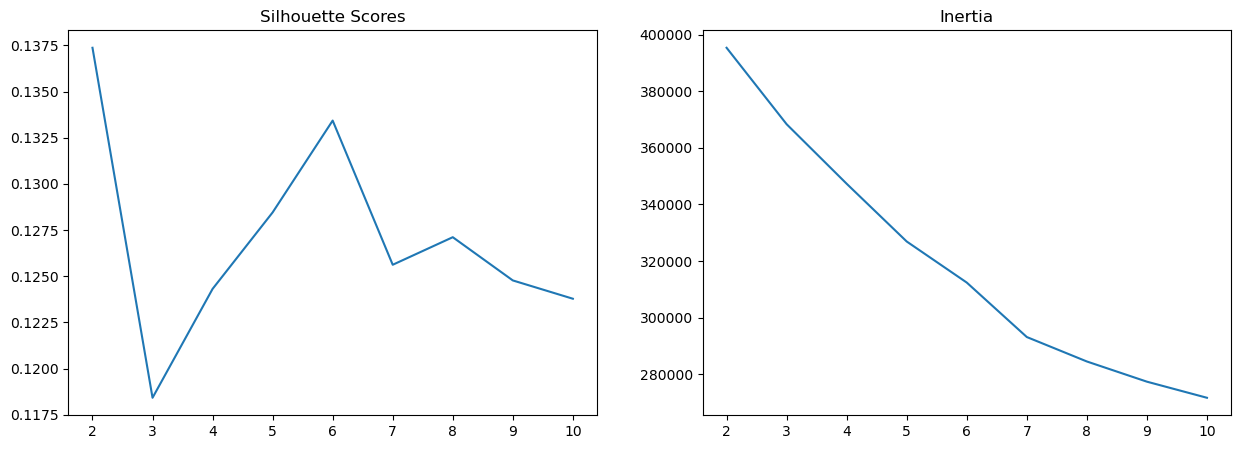

In [15]:
# Iterate over a range of k clusters to find the optimal number of clusters
ks = range(2,11)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, n_init = 'auto', random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)
#plot inertias and silhouette scores for each number of clusters.
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

Choosing 6 clusters based on choosing highest silhouette score in proximity to inertia elbow.

In [18]:
# Refit KMeans with 6 clusters
kmeans = KMeans(n_clusters=6, n_init= 'auto', random_state=42)
kmeans.fit(X_scaled)
# Add the clusters as a column in the dataframe
df['cluster'] = kmeans.labels_
df.head()

,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied,cluster
0,26,3,2062,2,3,3,3,2,2,2,...,3,3,2,0,0,0,1,1,0,3
1,52,3,680,5,5,5,5,3,4,4,...,4,4,4,18,2,0,1,1,1,1
2,28,1,188,3,5,3,4,3,3,3,...,4,5,3,0,0,1,1,0,0,0
3,54,3,453,3,5,5,5,3,4,4,...,4,3,1,91,80,0,1,1,0,2
4,40,1,775,4,3,3,3,4,4,4,...,3,3,4,0,0,1,1,1,0,2


In [19]:
# Group the dataframe by cluster and aggregate by mean values
# Add as_index=False so that the clusters are a column, not the index
cluster_groups = df.groupby('cluster', as_index=False).mean()
cluster_groups

,cluster,Age,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Loyal Customer,Business Travel,satisfied
0,0,38.311329,1.210724,762.430672,2.475930,3.815221,2.430672,2.957048,3.839435,2.765639,...,3.895359,3.426059,3.965984,3.874604,9.912655,10.168060,0.506198,0.997694,0.028538,0.082156
1,1,43.715159,2.781938,1721.467298,3.227995,3.007335,3.082671,3.010850,3.646546,4.213936,...,4.220966,3.697586,4.227231,3.894254,8.794621,8.788356,0.501987,0.958588,0.986553,0.969285
2,2,46.373139,2.118292,1284.651026,2.531891,2.926103,2.753021,2.894071,3.155662,3.413037,...,2.186850,2.773251,2.176735,3.088789,10.716493,11.467828,0.408542,0.986794,0.733914,0.266086
3,3,32.189231,1.591250,839.028734,2.425835,3.030028,2.651048,2.955734,1.569764,2.350246,...,3.695056,3.115713,3.731815,1.552679,10.045302,10.545690,0.559928,0.679006,0.568988,0.149884
4,4,38.448339,1.979705,1228.461255,2.752768,3.134686,2.752768,3.134686,3.044280,3.280443,...,3.640221,3.225092,3.282288,3.295203,179.219557,182.180812,0.498155,0.815498,0.701107,0.369004
5,5,29.828473,1.676718,683.014829,2.457736,2.169550,2.415225,2.990114,3.912506,2.437963,...,3.612457,3.124567,3.632229,3.930302,10.057341,10.324765,0.437469,0.022739,0.995057,0.151755


#### 5. Analyze and report on the clusters.

Describe each cluster.

Cluster 0 is lowest in Mean Class and 2nd lowest in Mean Flight Distance and Mean Ease of Online Booking. Conversely, this cluster is highest in Mean Departure/Arrival Time Convenient, as well as near the top in Mean Gate location and Mean food and drink

How are the clusters different?

Create 2 report quality explanatory visualizations showing important differences between the clusters.

Interpret and explain each visualization.

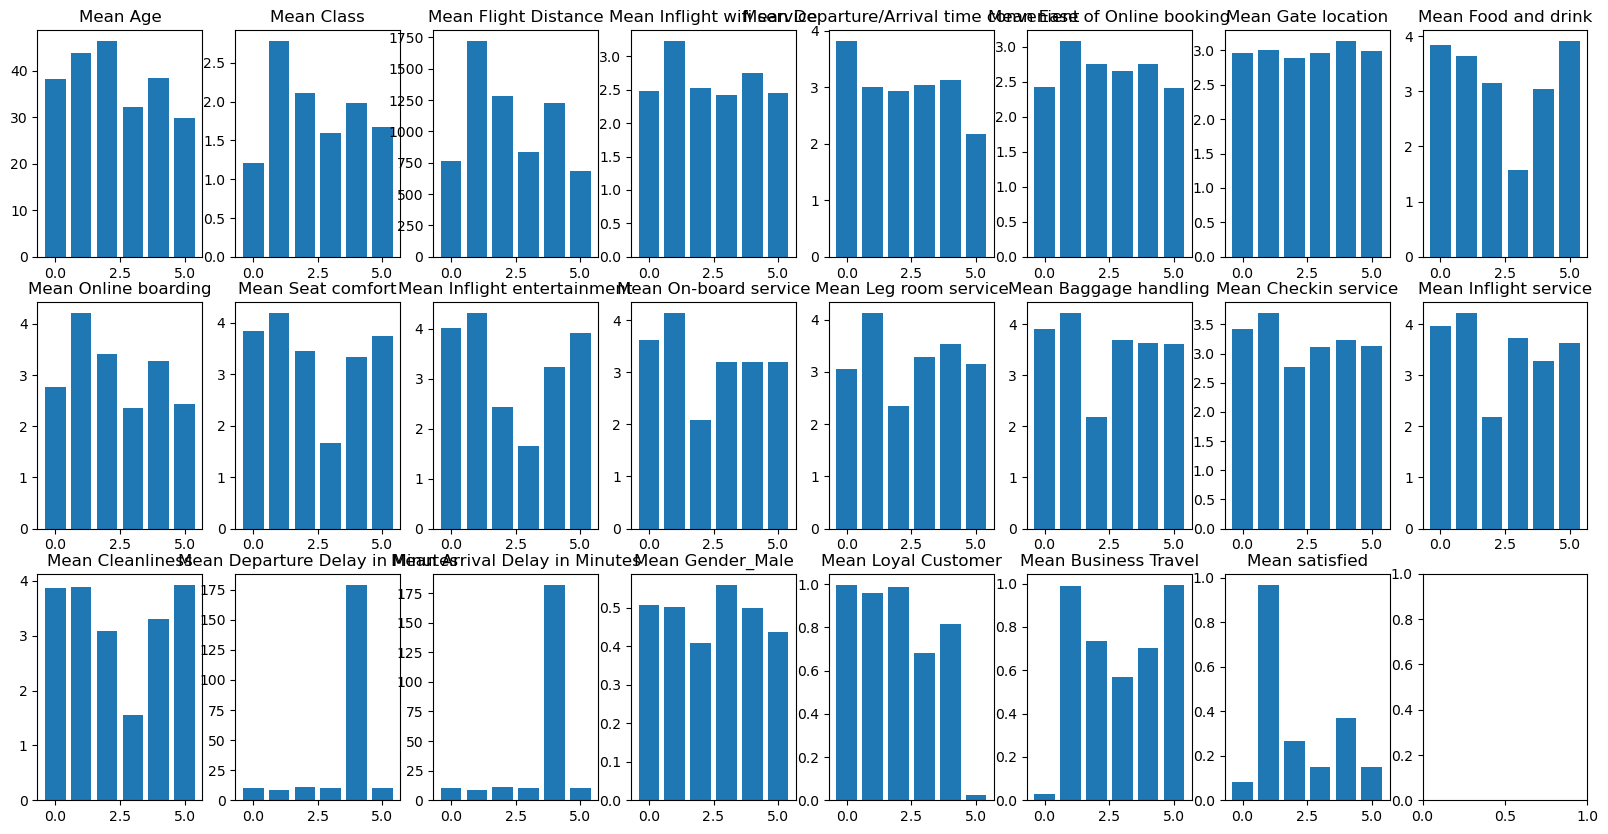

In [24]:
# Visualize means 
fig, axes = plt.subplots(3,8, figsize = (20, 10))
# fig is an array of dimensions 3,4.  axes.ravel() will flatten it to 12,1
axes = axes.ravel()
# Loop over columns and plot each in a separate figure, skip 'cluster' column
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

### Modeling Instructions:

The airline would also like to know how well overall satisfaction can be predicted from information about passengers and satisfaction with specific parts of their experience. Your target will be the 'satisfied' column.

1. Use random_state = 42 for your train_test_split


In [21]:
# Define X and y
X = df.drop(columns = 'satisfied')
y = df['satisfied']

In [23]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

2. Use PCA to prepare the data for modeling.
a. Reduce the number of features in the data
b. Be sure to use the PCA-transformed data when you fit and validate your predictive model.

3. Do not leak data while preparing your data for modeling.

In [37]:
# define pca to address 95% of variance
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

# fit and transform on training data
X_train_pca = pca.fit_transform(X_train)

# transform test data
X_test_pca = pca.transform(X_test)

4. Use a deep learning model to predict whether customers will report that they were satisfied.​
    a. Use the PCA-transformed data you created in Step 2.
   
    b. Create 3 different versions of a sequential model.
   
        i. Each new model should be an iteration of the previous model.

       ii. Justify in writing why you changed what you did for each new model. (For example, why did you add  layers, regularization, nodes, etc)

       iii. Adding or reducing epochs does not count as a new model.

               c. Use some form of regularization with at least one model.

    d. Evaluate each model with multiple appropriate metrics.

5. Choose a final model and justify your choice.


6. Evaluate your final model with multiple metrics.


7. Based on those metrics, explain in writing how well your model will solve the business problem.